<a href="https://colab.research.google.com/github/jh0n3/at01/blob/master/at05_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Atividade 05 - Regressão**

## **Dados de Árvores emergentes na Amazônia Brasileira**

* Dataset contendo atributos oriundos de um Modelo Digital de Terreno (MDT) bem como a localização de árvores que se elevam além do dossel florestal, ditas árvores emergentes, na Amazônia brasileira.
* Os atributos topográficos (numéricos) são:
 * Altura das árvores - CHM 
 * Elevação (altitude) - DTM
 * Indice Topográfico de Umidade - TWI
 * Declividade - SLP
 * Aspecto (azimute da declividade) - ASP
 * Distância horizontal até o corpo dágua mais próximo - HDI
 * Distância vartical até o corpo dágua mais próximo - VDI
 * Índice de Posição Topográfica - TPI
 * Índice de Convergência Topográfica - TCI

* 823 instâncias



**Montando o ambiente no Google Drive**


In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


## 1. Importar bibliotecas necessárias

In [3]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor



## 2. Lendo os dados

In [4]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/ML_jh0n3/TreeHeight.csv')
dados.head()

,CHM,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,40.043488,61.120060,4.170820,23.595406,172.653213,349.963867,15.858414,0.039650,3.051421
1,40.803257,87.320686,5.973617,5.220143,109.360336,498.925964,16.813614,-0.006691,3.931773
2,44.290775,86.443787,6.466589,5.382464,112.168320,480.198059,15.936714,0.004288,4.481259
3,43.293087,77.631767,6.142324,4.048486,124.221435,246.634567,7.124695,0.006981,4.236615
4,46.776566,82.776001,5.763402,7.968317,17.863457,181.793945,12.268929,-0.073959,3.054425


# **Hipótese:** As variáveis topográficas infuenciam na altura das árvores da Amazônia

## 3. Limpeza e organização dos dados

In [5]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [6]:
#excluir colunas irrelevantes
#dados = dados.drop(columns=['RDM','RGX','DIR, 'TRI'])
#dados.head()

## 4. Análise preliminar dos dados

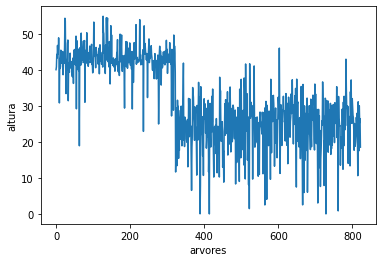

In [7]:
#plotando altura das árvores
plt.plot(dados.CHM)
plt.xlabel('arvores')
plt.ylabel('altura')
plt.show()

### **Comentários:** É possivel perceber no gráfico acima (série das alturas), que parte da alturas da árvores se concentra entre 40-50m e parte entre 20-30, com excessões em ambos os casos. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


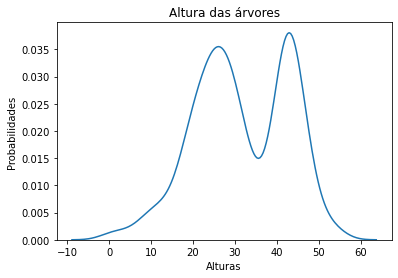

In [8]:
# distribuição de probabilidade de altura
sns.distplot(dados.CHM, hist=False, rug=False)
plt.xlabel('Alturas')
plt.ylabel('Probabilidades')
plt.title('Altura das árvores')

plt.show()

### **Comentários:** Como todos os atributos são contínuos não faz sentido plotar os gráficos de barra entre os atributos descritores e de classe.

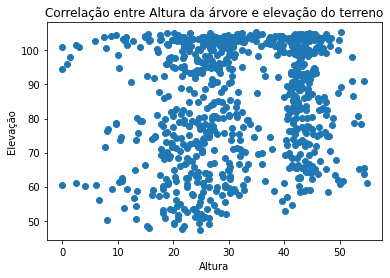

In [9]:
# plotando correlação entre alura e elevação
plt.scatter(dados.CHM,dados.DTM)
plt.xlabel('Altura')
plt.ylabel('Elevação')
plt.title('Correlação entre Altura da árvore e elevação do terreno')
plt.show()

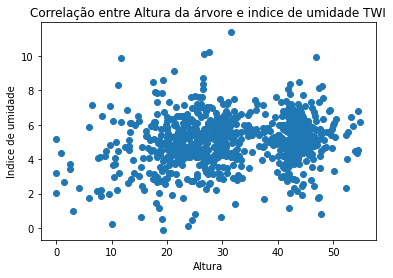

In [10]:
# plotando correlação entre altura e umidade
plt.scatter(dados.CHM,dados.TWI)
plt.xlabel('Altura')
plt.ylabel('Indice de umidade')
plt.title('Correlação entre Altura da árvore e indice de umidade TWI')
plt.show()

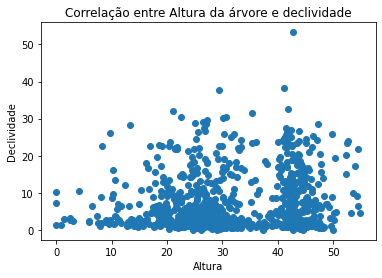

In [11]:
# plotando correlação entre alura e declividade
plt.scatter(dados.CHM,dados.SLP)
plt.xlabel('Altura')
plt.ylabel('Declividade')
plt.title('Correlação entre Altura da árvore e declividade')
plt.show()

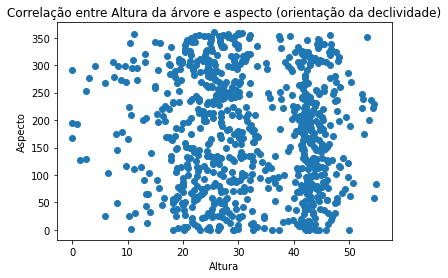

In [12]:
# plotando correlação entre alura e declividade
plt.scatter(dados.CHM,dados.ASP)
plt.xlabel('Altura')
plt.ylabel('Aspecto')
plt.title('Correlação entre Altura da árvore e aspecto (orientação da declividade)')
plt.show()

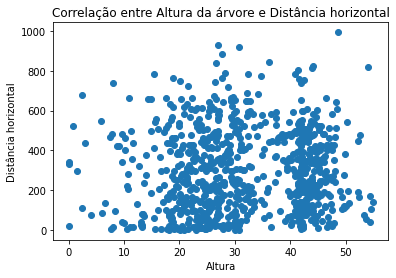

In [13]:
# plotando correlação entre alura e distancia horizontal
plt.scatter(dados.CHM,dados.HDI)
plt.xlabel('Altura')
plt.ylabel('Distância horizontal')
plt.title('Correlação entre Altura da árvore e Distância horizontal')
plt.show()

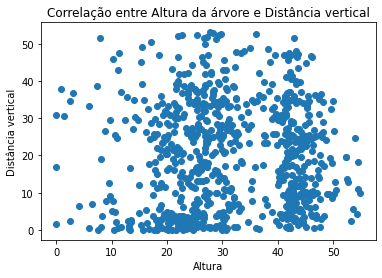

In [14]:
# plotando correlação entre altura e distancia vertical
plt.scatter(dados.CHM,dados.VDI)
plt.xlabel('Altura')
plt.ylabel('Distância vertical')
plt.title('Correlação entre Altura da árvore e Distância vertical')
plt.show()

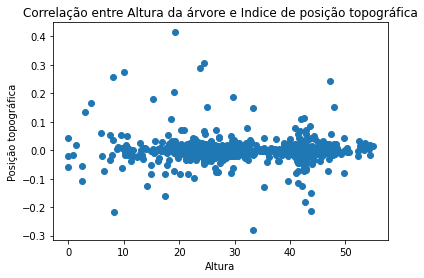

In [15]:
# plotando correlação entre altura e posição topográfica
plt.scatter(dados.CHM,dados.TPI)
plt.xlabel('Altura')
plt.ylabel('Posição topográfica')
plt.title('Correlação entre Altura da árvore e Indice de posição topográfica')
plt.show()

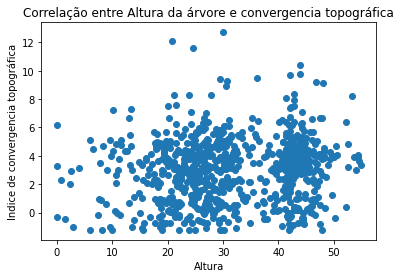

In [16]:
# plotando correlação entre alura e indice de convergencia topográfica
plt.scatter(dados.CHM,dados.TCI)
plt.xlabel('Altura')
plt.ylabel('Indice de convergencia topográfica')
plt.title('Correlação entre Altura da árvore e convergencia topográfica')
plt.show()


## **Comentários:** A princípio, não é possivel observar qualquer correlação entre os atributos descritores e o atributo de classe. Devido À natureza dos dados, os modelos podem apresentar dificuldades em extrair a função de regressão.

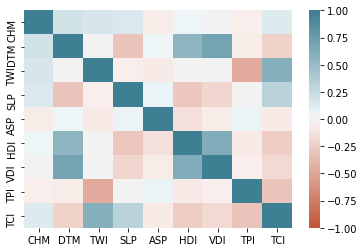

In [ ]:
#calculando a correlaçao e plotando coeficientes de correlação em um mapa de calor
corr = dados.corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

### **Comentários:** No correlograma acima, percebe-se correlações muito fracas entre os atributos dscritores e o CHM (altura do dossel) o que, possivelmente, afetará as análises que seguem.

## 5. Re-escalonamento dos dados

In [17]:
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,CHM,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0.729618,0.238312,0.372488,0.442701,0.479654,0.352155,0.298765,0.460300,0.306798
1,0.743461,0.689656,0.529260,0.097941,0.303818,0.502050,0.316761,0.393586,0.369912
2,0.807006,0.674550,0.572129,0.100987,0.311619,0.483205,0.300240,0.409391,0.409306
3,0.788828,0.522750,0.543930,0.075958,0.345104,0.248179,0.134226,0.413268,0.391767
4,0.852299,0.611367,0.510979,0.149503,0.049627,0.182932,0.231141,0.296743,0.307013


### 6. Organizando dados para modelagem

### Dividir os dados em atributos descritores e atributo de classe (target)

In [19]:
#separando dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0.238312,0.372488,0.442701,0.479654,0.352155,0.298765,0.460300,0.306798
1,0.689656,0.529260,0.097941,0.303818,0.502050,0.316761,0.393586,0.369912
2,0.674550,0.572129,0.100987,0.311619,0.483205,0.300240,0.409391,0.409306
3,0.522750,0.543930,0.075958,0.345104,0.248179,0.134226,0.413268,0.391767
4,0.611367,0.510979,0.149503,0.049627,0.182932,0.231141,0.296743,0.307013


In [20]:
y = dados.CHM
y.head()

0    0.729618
1    0.743461
2    0.807006
3    0.788828
4    0.852299
Name: CHM, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#random_state=0

## 7. Treinando os modelos e fazendo previsão

In [22]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)

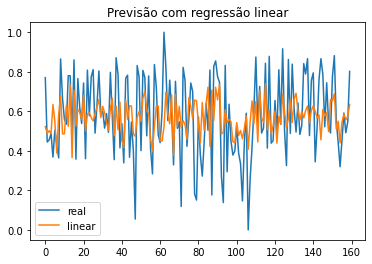

In [ ]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

### **Comentários:** Nota-se a baixa aderência entre o previsto e o real. Este fato possivelmente se deve ao dados serem pouco informativos. Os valores previstos (em laranja) apresentam menor amplitude que o real (em azul), aparentemente, subestimando a altura das árvores.


In [25]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

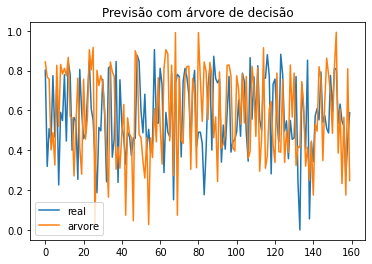

In [26]:
#plotando resultados da árvore de decisão
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

### **Comentários:** Nota-se a baixa aderência entre o previsto e o real. 
Diferentemente da **regressão**, os valores previstos (em laranja) apresentam maior amplitude que o real (em azul). O que sugere uma superestimação da altura.

In [27]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)

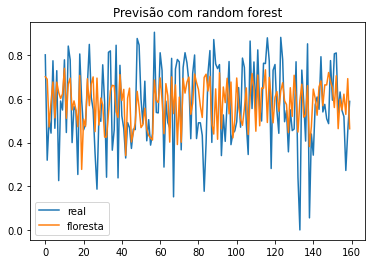

In [28]:
#plotando resultados da random forest
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

### **Comentários:** O RF, aparentemente, fornece um resultado entre os fornecidos pelos RL e árvore de decisão. Embora o resultado (altura das arvores) aparentem ser subestimados.  

In [29]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

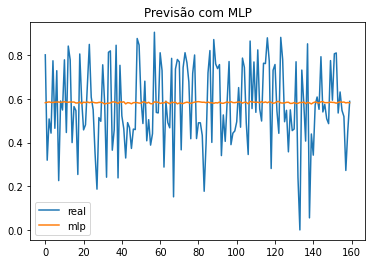

In [30]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

### **Comentários:** A MLP fornece, entre os métodos analisados aqui, o resultado aparentemente menso significatico dada a baixíssima amplitude entre os valores estimados.

## **8. Avaliando os modelos**

### Mean Absolute Error (MAE)

In [31]:
from sklearn.metrics import mean_absolute_error

In [36]:
#Mae RL
mean_absolute_error(y_test,pred_linear)

0.15360860328994547

In [33]:
#Mae Árvore
mean_absolute_error(y_test,pred_arvore)

0.20908349601932535

In [34]:
#Mae Random Forest
mean_absolute_error(y_test,pred_floresta)

0.14280716732945625

In [35]:
#Mae MLP
mean_absolute_error(y_test,pred_mlp)

0.16006546549252915

### **Comentários:** Mesmo que com a não desnormalização dos dados, os resultados apresentaram grandes erros de previsão. Ainda que o RF aprestnaou o menor erro dentre os metodos analisados, corroborando a análise visual. Contudo, a MLP, que apresentou visualmente a maior suberstimação mostrou o segundo "melhor" resultado.

### Mean Squared Error (MSE)

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_test,pred_linear)

0.03650432388370848

In [39]:
mean_squared_error(y_test,pred_arvore)

0.07165831325029473

In [40]:
mean_squared_error(y_test,pred_floresta)

0.03289304362993253

In [41]:
mean_squared_error(y_test,pred_mlp)

0.036456207756753026

### Root Mean Squared Error (RMSE)

In [42]:
mean_squared_error(y_test,pred_linear)**(1/2)

0.19106104753117126

In [ ]:
mean_squared_error(y_test,pred_arvore)**(1/2)

0.24355244248588556

In [43]:
mean_squared_error(y_test,pred_floresta)**(1/2)

0.18136439460360604

In [44]:
mean_squared_error(y_test,pred_mlp)**(1/2)

0.19093508780932075

### Mean Absolute Percentage Error (MAPE)

In [ ]:
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [ ]:
mean_absolute_percentage_error(y_test,pred_linear)

6.622084334907181

In [ ]:
mean_absolute_percentage_error(y_test,pred_arvore)

8.170982643773034

In [ ]:
mean_absolute_percentage_error(y_test,pred_floresta)

6.736734895663746

In [ ]:
mean_absolute_percentage_error(y_test,pred_mlp)

9.072379536272676

### **Comentários:** Dentre os métodos analisados os resultados foram ruins, ora por subestimar ora por superestimar as alturas das árvores. Contudo, na estapa de avaliação dos modelos, as três primeiras métricas apresentaram o mesmo ranking, em ordem decrescente: RF, MLP, RL, AD. Porém o MAPE apresentou um ranking diferente: RL, RF, AD e MLP. O resultado MAPE apresentou comportamento diferente das outras métricas analisadas, contudo os erros verificados foram muito elevados, possivelmente, como já mencionado à baixa significancia dos atributos preditores na altura das árvores. 